In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
df = pd.read_csv("/Users/alizeeblanchon/Documents/Data_Scientist/data_project/mai25_bds_accidents/data/raw/accidents_2019_2023.csv")



/var/folders/zf/7kchqtxx0kb4wh2ykpks70k40000gn/T/ipykernel_97778/197867689.py:1: DtypeWarning: Columns (42,45,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/alizeeblanchon/Documents/Data_Scientist/data_project/mai25_bds_accidents/data/raw/accidents_2019_2023.csv")


657865 lignes 54 colonnes


In [20]:
unique = df.nunique()
print(unique)

Num_Acc        273226
id_vehicule    463184
num_veh            81
senc                5
catv               32
obs                19
obsm                8
choc               11
manv               28
motor               8
occutc             40
place              11
catu                3
grav                5
sexe                3
an_nais           112
trajet              8
secu1              11
secu2              11
secu3              11
locp               11
actp               13
etatp               4
jour               31
mois               12
an                  5
hrmn             1440
lum                 6
dep               116
com             22984
agg                 2
int                10
atm                10
col                 8
adr            104498
lat            257154
long           259671
catr                8
voie            44907
v1                  4
v2                 44
circ                5
nbv                31
vosp                5
prof                5
pr        

In [35]:
# Affiche le % de chaque modalité
print(df["lat"].value_counts(normalize=True)*100)

lat
46,73494100      0.016417
43,1213200       0.014593
49,20562600      0.009880
48,7900000       0.008512
48,8100000       0.007600
                   ...   
48,7678501065    0.000152
46,6329800       0.000152
43,8899710       0.000152
49,25662950      0.000152
48,4497780000    0.000152
Name: proportion, Length: 257154, dtype: float64


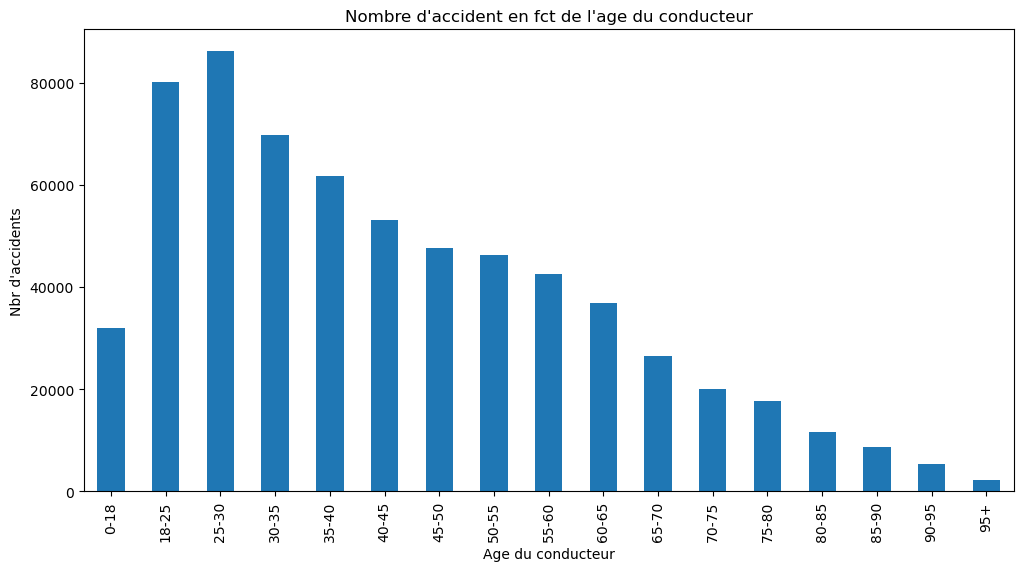

/var/folders/zf/7kchqtxx0kb4wh2ykpks70k40000gn/T/ipykernel_97778/810854976.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="grav", y="age", palette="muted")


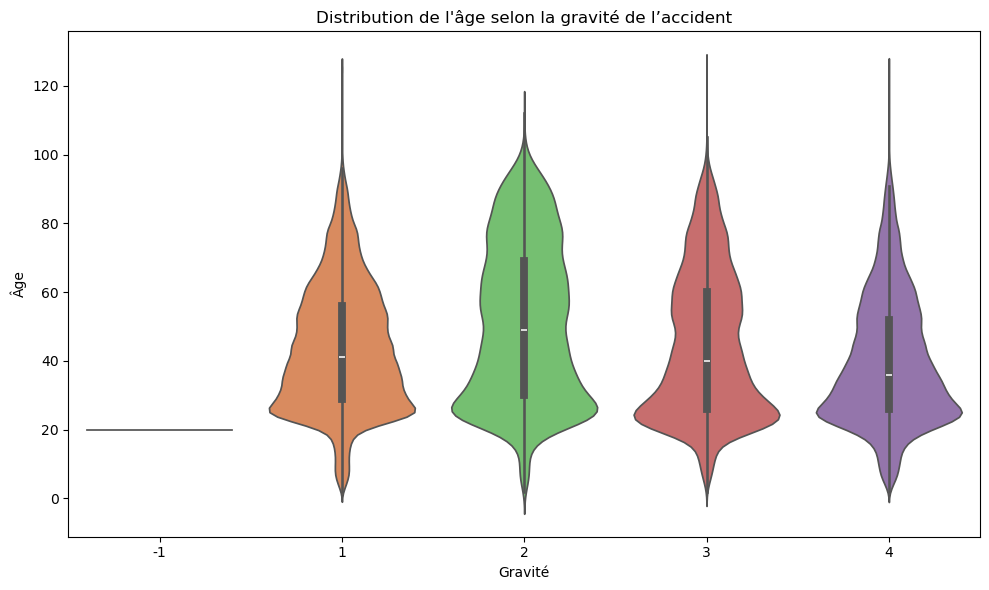

In [56]:
# Nombre d'accidents en fct de l'age du conducteur
import matplotlib.pyplot as plt
annee = 2025

df["age"] = annee - df["an_nais"]

#compte le nbr d'accident par age
accidents_par_age = df["age"].value_counts().sort_index()
bins = [0,18,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,140]
labels=["0-18","18-25","25-30","30-35","35-40","40-45","45-50","50-55","55-60","60-65","65-70","70-75","75-80","80-85","85-90","90-95","95+"]

df["age_group"]=pd.cut(df["age"],bins=bins,labels=labels,right=False)
accidents_par_gpe_age = df["age_group"].value_counts().sort_index()

plt.figure(figsize=(12,6))
accidents_par_gpe_age.plot(kind="bar")
plt.title("Nombre d\'accident en fct de l\'age du conducteur")
plt.xlabel("Age du conducteur")
plt.ylabel("Nbr d\'accidents")
plt.show()


plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="grav", y="age", palette="muted")
plt.title("Distribution de l'âge selon la gravité de l’accident")
plt.xlabel("Gravité")
plt.ylabel("Âge")
plt.tight_layout()
plt.show()

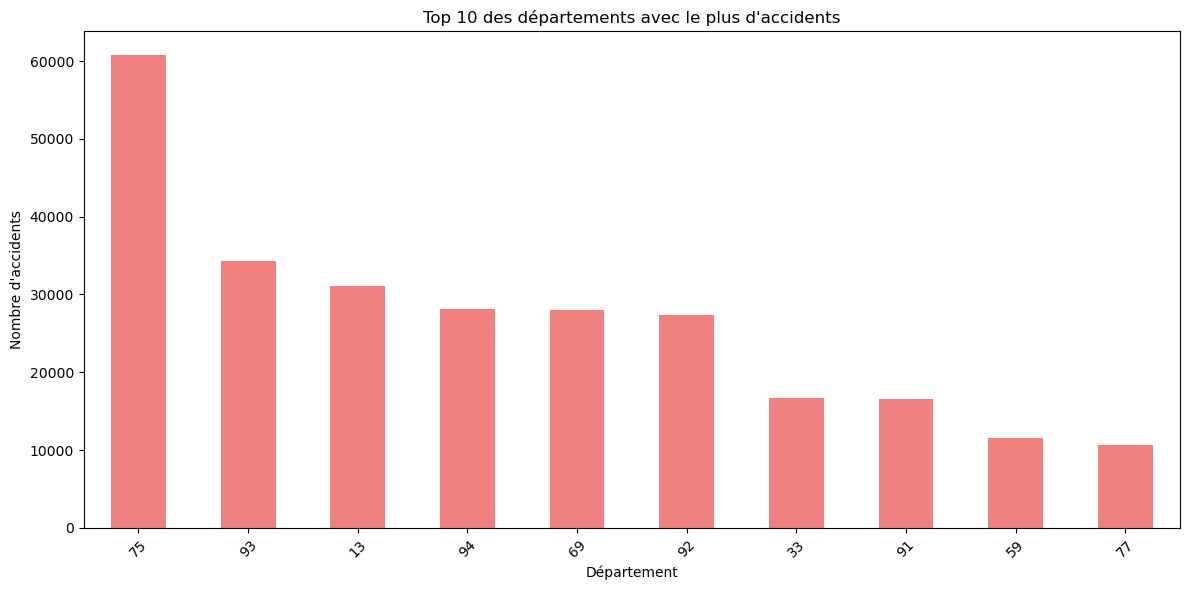

In [40]:
accidents_par_departement = df['dep'].value_counts().head(10)

plt.figure(figsize=(12, 6))
accidents_par_departement.plot(kind='bar', color='lightcoral')
plt.title('Top 10 des départements avec le plus d\'accidents')
plt.xlabel('Département')
plt.ylabel('Nombre d\'accidents')
plt.xticks(rotation=45)
plt.tight_layout()

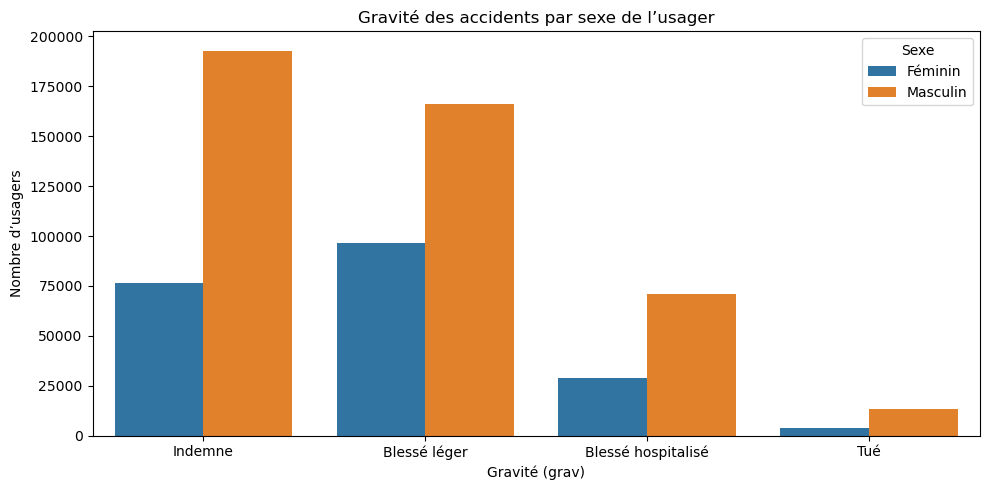

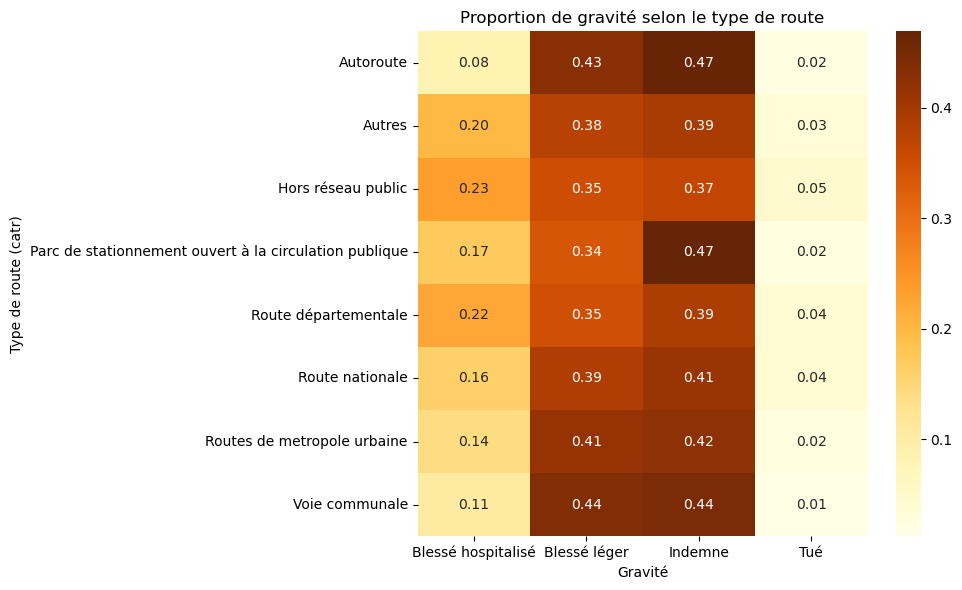

In [52]:
# Dictionnaire avec l'equivalent des valeurs
grav_mapping = {
    1: "Indemne",
    2: "Tué",
    3: "Blessé hospitalisé",
    4: "Blessé léger"
}
sexe_mapping = {
    1: "Masculin",
    2: "Féminin"
}
catr_mapping ={
    1:"Autoroute",
    2:"Route nationale",
    3:"Route départementale",
    4: "Voie communale",
    5:"Hors réseau public",
    6:"Parc de stationnement ouvert à la circulation publique",
    7:"Routes de metropole urbaine",
    9:"Autres",
    }
df_viz=df.copy()
df_viz["grav"] = df_viz["grav"].map(grav_mapping)
df_viz["sexe"] = df_viz["sexe"].map(sexe_mapping)
df_viz["catr"] = df_viz["catr"].map(catr_mapping)

plt.figure(figsize=(10,5))
sns.countplot(data=df_viz, x="grav", hue="sexe",order=["Indemne", "Blessé léger", "Blessé hospitalisé", "Tué"])
plt.title("Gravité des accidents par sexe de l’usager")
plt.xlabel("Gravité (grav)")
plt.ylabel("Nombre d’usagers")
plt.legend(title="Sexe")
plt.tight_layout()
plt.show()

heatmap_data = pd.crosstab(df_viz["catr"], df_viz["grav"], normalize="index")

# Affichage
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, cmap="YlOrBr", fmt=".2f")
plt.title("Proportion de gravité selon le type de route")
plt.xlabel("Gravité")
plt.ylabel("Type de route (catr)")
plt.tight_layout()
plt.show()

/var/folders/zf/7kchqtxx0kb4wh2ykpks70k40000gn/T/ipykernel_97778/3603173761.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="catv", y="grav", estimator="mean", ci=None)


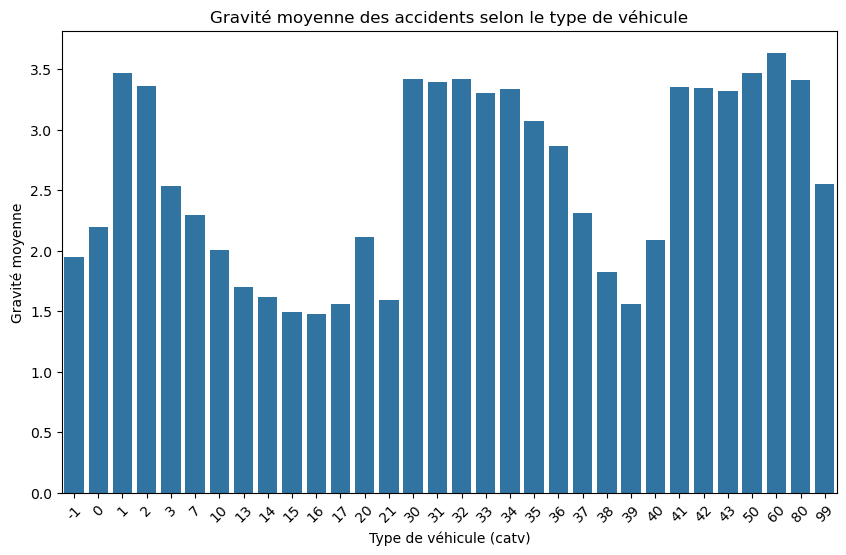

In [50]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="catv", y="grav", estimator="mean", ci=None)
plt.title("Gravité moyenne des accidents selon le type de véhicule")
plt.xlabel("Type de véhicule (catv)")
plt.ylabel("Gravité moyenne")
plt.xticks(rotation=45)
plt.show()

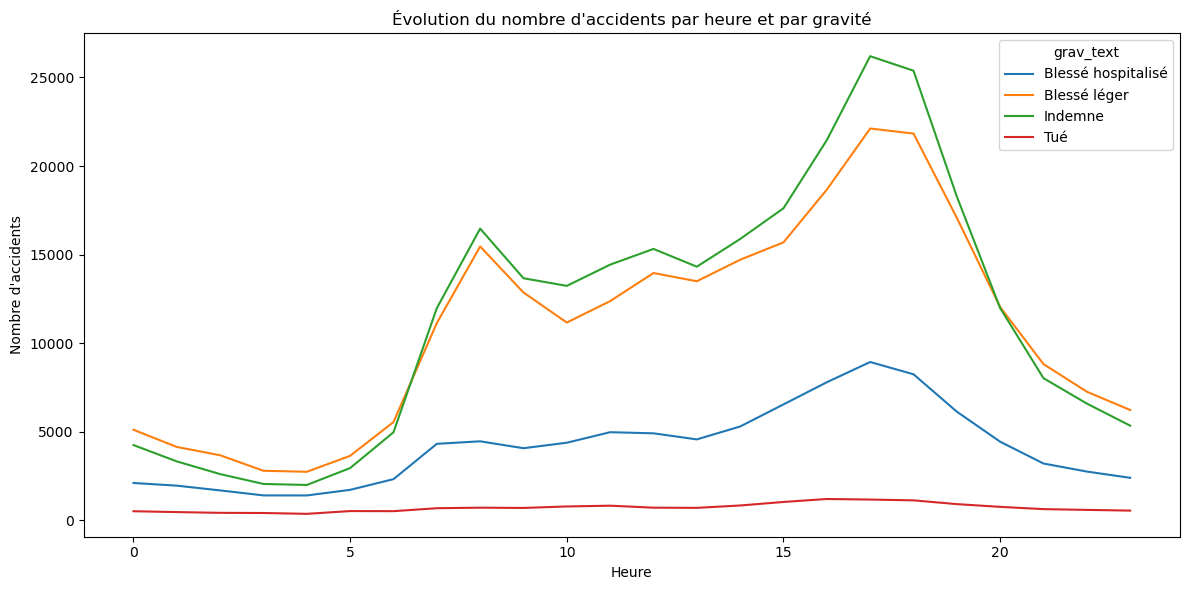

In [57]:
# Nombre d'accidents par heure et gravité
df["heure"] = pd.to_numeric(df["hrmn"].str[:2], errors="coerce")

# Mapping
grav_mapping = {
    1: "Indemne",
    2: "Tué",
    3: "Blessé hospitalisé",
    4: "Blessé léger"
}
df["grav_text"] = df["grav"].map(grav_mapping)

# Grouper
hourly = df.groupby(["heure", "grav_text"]).size().reset_index(name="count")

# Graphique
plt.figure(figsize=(12,6))
sns.lineplot(data=hourly, x="heure", y="count", hue="grav_text")
plt.title("Évolution du nombre d'accidents par heure et par gravité")
plt.xlabel("Heure")
plt.ylabel("Nombre d'accidents")
plt.tight_layout()
plt.show()